In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score

seed = 1234
np.random.seed(seed)

connect Id with champName in synergy.csv

In [2]:
df_1 = _deepnote_execute_sql('SELECT s.champName1, n1.champId as champId1, s.champName2, n2.champId as champId2, s.synergy_score\nFROM \'synergy.csv\' s, \'names.csv\' n1, \'names.csv\' n2\nWHERE s.champName1 = n1.champName and s.champName2 = n2.champName\nORDER by s.champName1', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,champName1,champId1,champName2,champId2,synergy_score
0,Aatrox,266,Aatrox,266,0.0000
1,Ahri,103,Aatrox,266,-0.0429
2,Ahri,103,Ahri,103,0.0000
3,Akali,84,Akali,84,0.0000
4,Akali,84,Aatrox,266,-0.0698
...,...,...,...,...,...
11320,Zyra,143,Kassadin,38,-0.5000
11321,Zyra,143,MissFortune,21,0.0833
11322,Zyra,143,Darius,122,0.1429
11323,Zyra,143,Pyke,555,-1.0000


In [3]:
synergy = pd.read_csv('atest.csv')
synergy.head(15)

,t1sup_winrate,t1adc_winrate,t1mid_winrate,t1jug_winrate,t1top_winrate,t2sup_winrate,t2adc_winrate,t2mid_winrate,t2jug_winrate,t2top_winrate,t1_synergy,t2_synergy,t1_win
0,0.498571,0.509730,0.509872,0.515848,0.475056,0.501131,0.496120,0.488550,0.519051,0.515809,0.2900,0.4459,0
1,0.506253,0.481649,0.492001,0.486434,0.518533,0.528324,0.489466,0.468247,0.498443,0.512729,0.0885,0.2837,1
2,0.491480,0.482073,0.515809,0.471676,0.515556,0.517466,0.493931,0.493934,0.530648,0.496091,-0.1020,0.1331,0
3,0.491480,0.495994,0.507958,0.455007,0.483320,0.501131,0.496120,0.501042,0.468247,0.512729,-0.0644,-0.0022,1
4,0.498571,0.478478,0.465220,0.472161,0.496091,0.491480,0.482073,0.472998,0.471676,0.468247,-0.6400,-0.8535,0
5,0.475610,0.482073,0.509872,0.522265,0.493931,0.501131,0.517481,0.509152,0.490714,0.499806,-0.3039,0.0941,0
6,0.528324,0.496120,0.486434,0.465220,0.469424,0.479853,0.493931,0.493934,0.503983,0.466667,-0.4078,-0.4293,0
7,0.501131,0.478478,0.486415,0.471676,0.521420,0.479853,0.482073,0.497881,0.455007,0.493931,-0.2801,-0.8044,1
8,0.528324,0.509730,0.488550,0.495266,0.483320,0.487907,0.482073,0.492001,0.465220,0.455007,-0.4450,-0.9088,0
9,0.519066,0.482073,0.486415,0.465220,0.474537,0.489466,0.531918,0.501042,0.472161,0.493812,-0.5723,-0.3824,1


In [4]:
y = np.array(synergy[['t1_win']]).ravel()
X = synergy.drop(['t1_win'], axis = 1)
X = X.to_numpy()

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=seed)
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Train: (42109, 12)
Val: (9023, 12)
Test: (9024, 12)


## Logistics Regression

In [5]:
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear',random_state=seed).fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.6627881205673759


In [6]:
from scipy.special import expit
print(lr.coef_)
print(lr.intercept_)
expit(lr.coef_)

[[-12.33559134 -11.62588006 -12.38535476 -12.11949842 -12.16568171
   12.38035437  12.04469747  11.90226674  11.78021957  12.55348947
    2.05854228  -2.03048865]]
[0.]


array([[4.39257151e-06, 8.93183236e-06, 4.17933280e-06, 5.45213178e-06,
        5.20606160e-06, 9.99995800e-01, 9.99994124e-01, 9.99993225e-01,
        9.99992346e-01, 9.99996467e-01, 8.86807927e-01, 1.16038790e-01]])

## Decision Tree Classifier

In [7]:
max_depth = [2, 5, 7, 10, 20]
dt_models = []
dt_train_acc = []
dt_val_acc = []

for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    dt_models.append(dt)
    dt_val_acc.append(dt.score(X_val, y_val))
    dt_train_acc.append(dt.score(X_train, y_train))

idx = np.argmax(dt_val_acc)  # index of the model with the highest validation accuracy
dt = dt_models[idx]
test_acc = dt.score(X_test, y_test)


print("Train acc:", dt_train_acc)
print("Val acc:", dt_val_acc)
print("Best model index:", idx)
print("Final test acc:", test_acc)

Train acc: [0.5933885867629248, 0.6318601724096986, 0.6422142534850032, 0.6745588828991427, 0.9513405685245434]
Val acc: [0.5851712290812369, 0.6226310539731796, 0.6195278732129004, 0.6153164136096642, 0.5583508810816802]
Best model index: 1
Final test acc: 0.6385195035460993


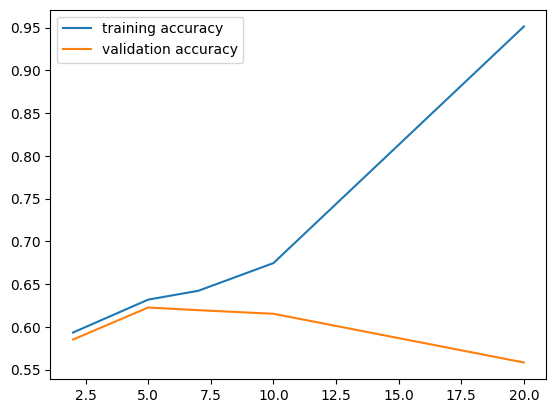

In [8]:
fig, ax = plt.subplots()
ax.plot(max_depth, dt_train_acc, label = 'training accuracy')
ax.plot(max_depth, dt_val_acc, label = 'validation accuracy')
ax.legend()

plt.show()

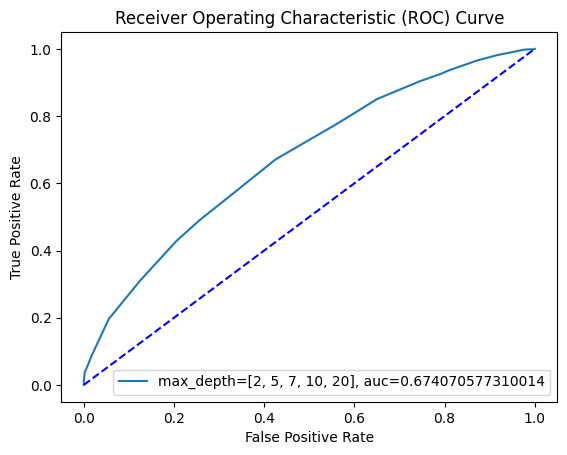

In [9]:
# best dt is defined above

# Get the predicted probabilities and keep probabilities for the positive outcome only
probs = dt.predict_proba(X_val)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, probs)

# Compute Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_val, probs)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'max_depth={max_depth}, auc={roc_auc}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


AUC for Decision Tree: 0.674070577310014
AUC for Logistic Regression: 0.7262286294077038
AUC for Multi-layer Perceptron classifier: 0.6874657468621251


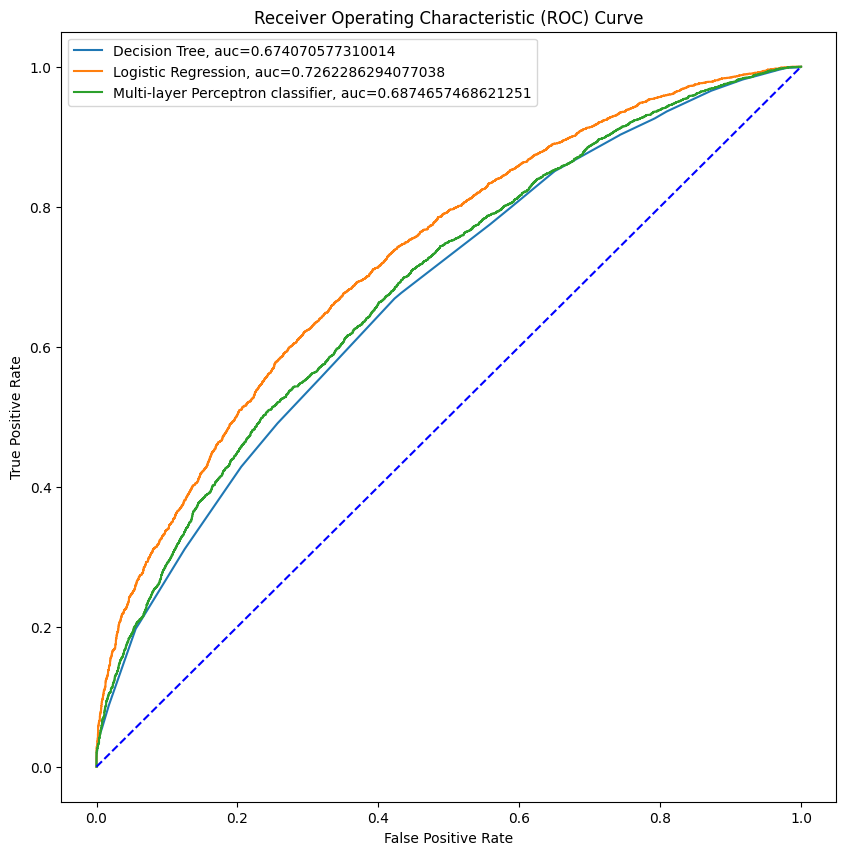

In [10]:
# dt should be defined in previous blocks
# lr should defined in previous blocks

# mlp classifier
mlp = MLPClassifier(hidden_layer_sizes=(88, 88), activation= 'logistic')
mlp.fit(X_val, y_val)
# Define a list of models
models = [dt, lr, mlp]
labels = ['Decision Tree', 'Logistic Regression', 'Multi-layer Perceptron classifier']

plt.figure(figsize=(10, 10))

# Loop over models
for model, label in zip(models, labels):
    # Get predicted probabilities for the positive class
    probs = model.predict_proba(X_val)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, probs)

    # Compute and print AUC score
    roc_auc = roc_auc_score(y_val, probs)
    print(f"AUC for {label}: {roc_auc}")

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{label}, auc={roc_auc}')

# Plot ROC for random predictions (diagonal)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Random Forest Classifer

In [11]:
n_est = [50, 100, 200, 500, 1000]
models = []
rf_train_acc = []
rf_val_acc = []

for i in n_est:
    rfc = RandomForestClassifier(n_estimators= i, max_depth=5, random_state=seed)
    rfc.fit(X_train, y_train)
    models.append(rfc)
    rf_val_acc.append(rfc.score(X_val, y_val))
    rf_train_acc.append(rfc.score(X_train, y_train))

idx = np.argmax(rf_val_acc)
model = models[idx]
test_acc = model.score(X_test, y_test)

print("Train acc:", rf_train_acc)
print("Val acc:", rf_val_acc)
print("Best model index:", idx)
print("Final test acc:", test_acc)

Train acc: [0.6415730603908903, 0.6410506067586502, 0.6415968082832648, 0.6417630435298867, 0.6419292787765086]
Val acc: [0.6302781779895822, 0.6280616203036684, 0.6268425135764158, 0.629613210683808, 0.6283941039565555]
Best model index: 0
Final test acc: 0.6384086879432624


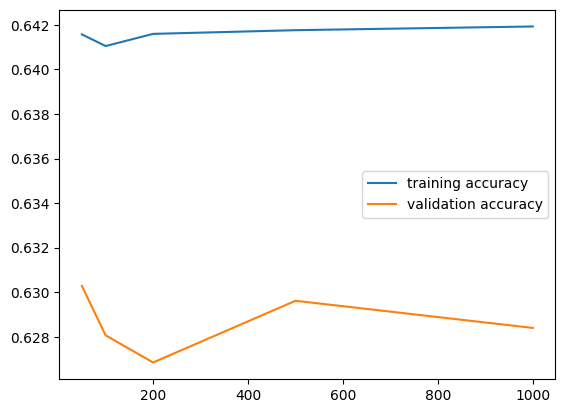

In [12]:
fig, ax = plt.subplots()
ax.plot(n_est, rf_train_acc, label = 'training accuracy')
ax.plot(n_est, rf_val_acc , label = 'validation accuracy')
ax.legend()

plt.show()

## MLP Classifier

In [13]:
hidden_layers = [(88,),(88, 88)]
activation = ['identity', 'logistic', 'tanh']
identity_tra_acc = []
logistic_tra_acc = []
tanh_tra_acc = []
relu_tra_acc = []
mlp_models = []

identity_val_acc = []
logistic_val_acc = []
tanh_val_acc = []
relu_val_acc = []

for i in activation:
    tra_acc = i + '_tra_acc'
    val_acc = i + '_val_acc'
    for j in hidden_layers:
        mlp = MLPClassifier(hidden_layer_sizes= j, activation=i)
        mlp.fit(X_train, y_train)
        mlp_models.append(mlp)
        locals()[tra_acc].append(mlp.score(X_train, y_train))
        locals()[val_acc].append(mlp.score(X_val, y_val))

print(identity_tra_acc, identity_val_acc)
print(logistic_tra_acc, logistic_val_acc)
print(tanh_tra_acc, tanh_val_acc)
print(relu_tra_acc, relu_val_acc)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[0.6521646203899404, 0.6570329383267235] [0.6572093538734346, 0.6517787875429458]
[0.6589090218243131, 0.6584815597615712] [0.6543278288817467, 0.6558794192618863]
[0.6607613574295281, 0.6618537604787575] [0.6593150836750526, 0.6592042557907569]
[] []


In [26]:
mlp_val_acc = []

for model in mlp_models:
    score = model.score(X_val, y_val)
    mlp_val_acc.append(score)


idx = np.argmax(mlp_val_acc)
mlp = mlp_models[idx]
test_acc = mlp.score(X_test, y_test)

print("Best mlp model index:", idx)
print("Details:", mlp)
print("Final test acc:", test_acc)

Best mlp model index: 4
Details: MLPClassifier(activation='tanh', hidden_layer_sizes=(88,))
Final test acc: 0.6660017730496454


In [42]:
print("Logistic regression test acc:", lr.score(X_test, y_test))
print("Decision tree test acc:", dt.score(X_test, y_test))
print("Random forest test acc:", rfc.score(X_test, y_test))
print("Multi-layer perceptron test acc:", mlp.score(X_test, y_test))

Logistic regression test acc: 0.6627881205673759
Decision tree test acc: 0.6385195035460993
Random forest test acc: 0.6404033687943262
Multi-layer perceptron test acc: 0.6660017730496454


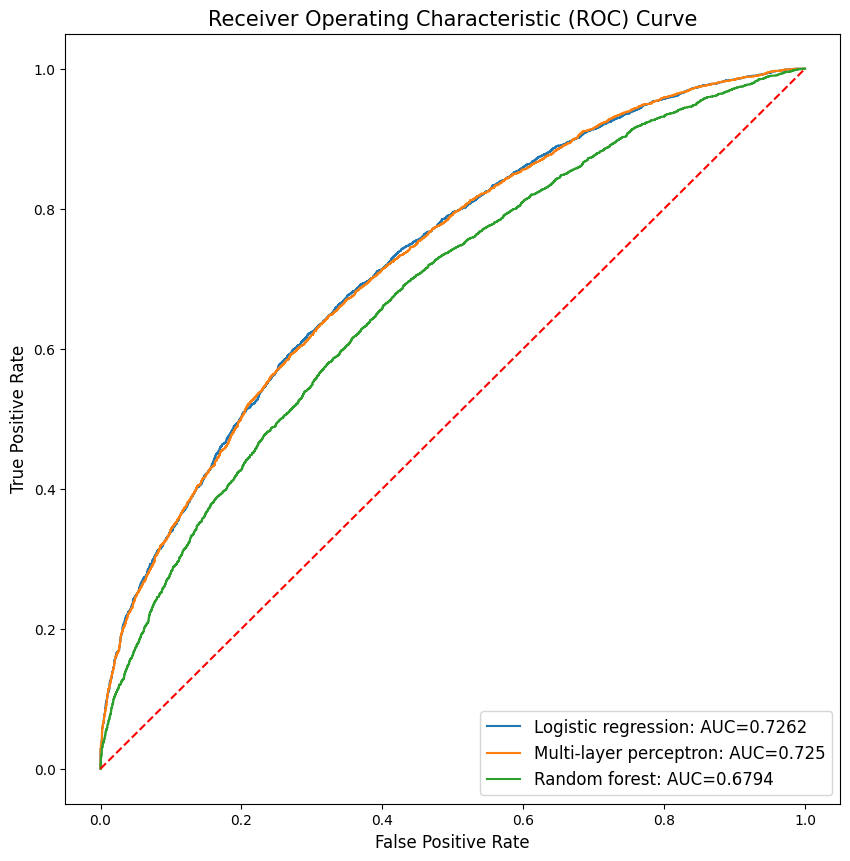

In [38]:
plt.figure(figsize=(10, 10))

# Logistic Regression
y_pred_proba = lr.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic regression: AUC="+str(round(auc, 4)))

# Multi-layer perceptron
y_pred_proba =mlp.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="Multi-layer perceptron: AUC="+str(round(auc, 4)))

# Random forest
y_pred_proba =rfc.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="Random forest: AUC="+str(round(auc, 4)))

# Decision tree
# y_pred_proba = dt.predict_proba(X_val)[:,1]
# fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
# auc = roc_auc_score(y_val, y_pred_proba)
# plt.plot(fpr,tpr,label="Decision tree: AUC="+str(round(auc, 4)))


plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylabel('True Positive Rate', size=12)
plt.xlabel('False Positive Rate', size=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', size=15)
plt.legend(loc=4, fontsize=12)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e55512df-58ef-402e-8f63-17a773fe09fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>